## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [19]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [20]:
pd.set_option('max_columns', None)
#pd.reset_option('max_columns')

In [21]:
df_flights = pd.read_csv('flights_data.csv')
df_flights

/Users/katrindar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,DL,DL_CODESHARE,DL,3468,9E,N292PQ,3468,15380,TVC,"Traverse City, MI",11433,DTW,"Detroit, MI",615,611.0,-4.0,26.0,637.0,712.0,9.0,738,721.0,-17.0,0.0,NaN,0.0,N,83.0,70.0,35.0,1.0,207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,DL,DL_CODESHARE,DL,3470,9E,N309PQ,3470,13871,OMA,"Omaha, NE",11433,DTW,"Detroit, MI",815,902.0,47.0,38.0,940.0,1208.0,11.0,1121,1219.0,58.0,0.0,NaN,0.0,N,126.0,137.0,88.0,1.0,651.0,47.0,0.0,11.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2018-01-01,DL,DL_CODESHARE,DL,3471,9E,N337PQ,3471,13487,MSP,"Minneapolis, MN",10627,BIS,"Bismarck/Mandan, ND",1505,1547.0,42.0,21.0,1608.0,1706.0,7.0,1650,1713.0,23.0,0.0,NaN,0.0,N,105.0,86.0,58.0,1.0,386.0,23.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2018-01-01,DL,DL_CODESHARE,DL,3472,9E,N932XJ,3472,12339,IND,"Indianapolis, IN",14635,RSW,"Fort Myers, FL",1455,1449.0,-6.0,17.0,1506.0,1706.0,4.0,1729,1710.0,-19.0,0.0,NaN,0.0,N,154.0,141.0,120.0,1.0,945.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,DL,DL_CODESHARE,DL,3472,9E,N932XJ,3472,14635,RSW,"Fort Myers, FL",12339,IND,"Indianapolis, IN",1810,1802.0,-8.0,13.0,1815.0,2019.0,4.0,2046,2023.0,-23.0,0.0,NaN,0.0,N,156.0,141.0,124.0,1.0,945.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321093,2019-01-08,UA,UA_CODESHARE,UA,4408,EV,N14907,4408,14685,SAV,"Savannah, GA",11618,EWR,"Newark, NJ",1845,1954.0,69.0,32.0,2026.0,2203.0,23.0,2059,2226.0,87.0,0.0,NaN,0.0,N,134.0,152.0,97.0,1.0,708.0,13.0,0.0,74.0,0.0,0.0,NaN,NaN,NaN,NaN
321094,2019-01-08,UA,UA_CODESHARE,UA,4409,EV,N881AS,4409,13930,ORD,"Chicago, IL",11775,FSD,"Sioux Falls, SD",1955,1948.0,-7.0,28.0,2016.0,2136.0,5.0,2150,2141.0,-9.0,0.0,NaN,0.0,N,115.0,113.0,80.0,1.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321095,2019-01-08,UA,UA_CODESHARE,UA,4410,EV,N13913,4410,13930,ORD,"Chicago, IL",11042,CLE,"Cleveland, OH",1005,955.0,-10.0,11.0,1006.0,1153.0,6.0,1230,1159.0,-31.0,0.0,NaN,0.0,N,85.0,64.0,47.0,1.0,315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321096,2019-01-08,UA,UA_CODESHARE,UA,4411,EV,N14570,4411,12266,IAH,"Houston, TX",12206,HRL,"Harlingen/San Benito, TX",1420,1415.0,-5.0,15.0,1430.0,1524.0,3.0,1540,1527.0,-13.0,0.0,NaN,0.0,N,80.0,72.0,54.0,1.0,295.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_flights.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance

In [23]:
df_flights['arr_delay'].describe()

count    319087.000000
mean          6.209491
std          52.340263
min         -78.000000
25%         -15.000000
50%          -5.000000
75%          10.000000
max        1778.000000
Name: arr_delay, dtype: float64

In [24]:
df_flights.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                  135
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                 1278
dep_delay                1441
taxi_out                 1308
wheels_off               1308
wheels_on                1416
taxi_in                  1416
crs_arr_time                0
arr_time                 1416
arr_delay                2011
cancelled                   0
cancellation_code      319770
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time      1962
air_time                 1962
flights                     0
distance                    0
carrier_de

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [25]:
# Set null values in arr_delay equal to zero (no flight delay or earlier-than-expected arrival)
arr_delay_df = df_flights['arr_delay'].fillna(value=0)
arr_delay_df.isnull().sum()

0

In [26]:
# Get an idea of the flight delay binning.
pd.cut(arr_delay_df, bins=10).value_counts()

(-79.856, 107.6]    310968
(107.6, 293.2]        8753
(293.2, 478.8]         897
(478.8, 664.4]         182
(664.4, 850.0]         138
(850.0, 1035.6]         87
(1035.6, 1221.2]        33
(1221.2, 1406.8]        20
(1406.8, 1592.4]        15
(1592.4, 1778.0]         5
Name: arr_delay, dtype: int64

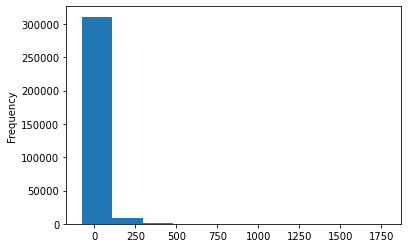

In [27]:
arr_delay_df.plot(kind='hist')
plt.show()

# Basic histogram of flight delays times vs. frequency

In [28]:
# Set dataframe range manually to deal with outliers, based on binning
arr_delay_df_filtered = arr_delay_df[arr_delay_df <= 107.6]

In [29]:
def evaluate_test(p,alpha):
    if p < alpha:
        return print("Since the p-value (", p, ") is less than the significance level alpha (", alpha, "), we REJECT the null hypothesis.")
    elif p == alpha:
        return print("Since the p-value (", p, ") is equal to the significance level alpha (", alpha, "), rejection/acceptance of the null hypothesis is INCONCLUSIVE.")
    else:
        return print("Since the p-value (", p, ") is greater than the significance level alpha (", alpha, "), we ACCEPT the null hypothesis.")

In [30]:
# Sample 5000 points to meet Scipy's Shapiro function requirements
arr_delay_df_5000 = np.random.choice(arr_delay_df_filtered, size=5000)

print(stats.shapiro(arr_delay_df_5000))

ShapiroResult(statistic=0.8723374605178833, pvalue=0.0)


In [31]:
evaluate_test(stats.shapiro(arr_delay_df_5000)[1], alpha=0.05)
print('i.e. the data indicates the delays are not from a Normal Distribution.')

Since the p-value ( 0.0 ) is less than the significance level alpha ( 0.05 ), we REJECT the null hypothesis.
i.e. the data indicates the delays are not from a Normal Distribution.


In [32]:
# Test hypothesis that the mean of the delay is 0.
stats.ttest_1samp(arr_delay_df_filtered, 0)

Ttest_1sampResult(statistic=-10.980086912872267, pvalue=4.821572176632269e-28)

In [33]:
evaluate_test(stats.ttest_1samp(arr_delay_df_filtered, 0)[1], alpha=0.05)
print('i.e. the data indicates the mean of the delays is not zero.')

Since the p-value ( 4.821572176632269e-28 ) is less than the significance level alpha ( 0.05 ), we REJECT the null hypothesis.
i.e. the data indicates the mean of the delays is not zero.


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [35]:
df_flights_all_2019_months = pd.read_csv('flights_data_all_2019_Months.csv')
df_flights_all_2019_months

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-03-31,AS,AS,AS,52,AS,N527AS,52,10299,ANC,"Anchorage, AK",14747,SEA,"Seattle, WA",1350,1337.0,-13.0,8.0,1345.0,1753.0,7.0,1820,1800.0,-20.0,0.0,NaN,0.0,N,210.0,203.0,188.0,1.0,1448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-08,B6,B6,B6,161,B6,N913JB,161,12478,JFK,"New York, NY",14893,SMF,"Sacramento, CA",1702,1656.0,-6.0,24.0,1720.0,1959.0,6.0,2037,2005.0,-32.0,0.0,NaN,0.0,N,395.0,369.0,339.0,1.0,2521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-09-13,AA,AA_CODESHARE,AA,4879,PT,N639AE,4879,14100,PHL,"Philadelphia, PA",10792,BUF,"Buffalo, NY",1343,1336.0,-7.0,20.0,1356.0,1453.0,3.0,1459,1456.0,-3.0,0.0,NaN,0.0,N,76.0,80.0,57.0,1.0,279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-09-17,DL,DL_CODESHARE,DL,3764,OO,N882AS,3764,11433,DTW,"Detroit, MI",10434,AVP,"Scranton/Wilkes-Barre, PA",2014,2009.0,-5.0,15.0,2024.0,2128.0,4.0,2149,2132.0,-17.0,0.0,NaN,0.0,N,95.0,83.0,64.0,1.0,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-04,UA,UA_CODESHARE,UA,4748,AX,N21144,4748,10868,CAE,"Columbia, SC",13930,ORD,"Chicago, IL",1825,1827.0,2.0,15.0,1842.0,1929.0,10.0,1952,1939.0,-13.0,0.0,NaN,0.0,N,147.0,132.0,107.0,1.0,666.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2019-08-27,B6,B6,B6,244,B6,N508JL,244,14027,PBI,"West Palm Beach/Palm Beach, FL",11618,EWR,"Newark, NJ",600,555.0,-5.0,11.0,606.0,824.0,8.0,850,832.0,-18.0,0.0,NaN,0.0,N,170.0,157.0,138.0,1.0,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299996,2019-12-26,DL,DL_CODESHARE,DL,4784,9E,N835AY,4784,11433,DTW,"Detroit, MI",13184,MBS,"Saginaw/Bay City/Midland, MI",843,838.0,-5.0,25.0,903.0,926.0,7.0,951,933.0,-18.0,0.0,NaN,0.0,N,68.0,55.0,23.0,1.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299997,2019-02-01,G4,G4,G4,1758,G4,330NV,1758,11697,FLL,"Fort Lauderdale, FL",13931,ORF,"Norfolk, VA",1512,1720.0,128.0,15.0,1735.0,1919.0,5.0,1718,1924.0,126.0,0.0,NaN,0.0,N,126.0,124.0,104.0,1.0,781.0,126.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
299998,2019-08-01,UA,UA_CODESHARE,UA,5780,OO,N134SY,5780,13485,MSN,"Madison, WI",14771,SFO,"San Francisco, CA",1553,1550.0,-3.0,13.0,1603.0,1825.0,4.0,1835,1829.0,-6.0,0.0,NaN,0.0,N,282.0,279.0,262.0,1.0,1772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Set arr_del nulls equal to zero
df_flights_all_2019_months['arr_delay'].fillna(value=0, inplace=True)
df_flights_all_2019_months['arr_delay'].isnull().sum()

0

In [37]:
# Format fl_date column as a date
df_flights_all_2019_months['fl_date'] = pd.to_datetime(df_flights_all_2019_months['fl_date'])

In [38]:
# Create fl_month column
df_flights_all_2019_months['fl_month'] = pd.DatetimeIndex(df_flights_all_2019_months['fl_date']).month

In [39]:
# Filter data to remove big outliers based on histogram data above
df_flights_all_2019_months_filtered = df_flights_all_2019_months[df_flights_all_2019_months['arr_delay'] < 293.2]

In [40]:
delay_means = df_flights_all_2019_months_filtered.groupby('fl_month')['arr_delay'].mean().reset_index()
delay_medians = df_flights_all_2019_months_filtered.groupby('fl_month')['arr_delay'].median().reset_index()
delay_means

,fl_month,arr_delay
0,1,1.943979
1,2,6.605568
2,3,1.210007
3,4,2.188060
4,5,4.098114
5,6,9.240838
6,7,5.837078
7,8,4.973081
8,9,-1.042919
9,10,1.178641


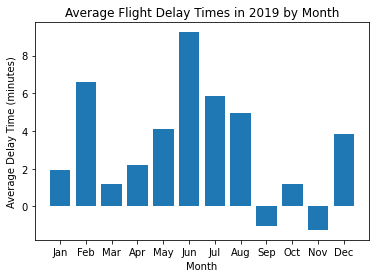

In [41]:
# Plot chart
data = delay_means['arr_delay']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xlabel('Month')
plt.ylabel('Average Delay Time (minutes)')
plt.title('Average Flight Delay Times in 2019 by Month')
plt.bar(x=labels, height=data)
plt.show()

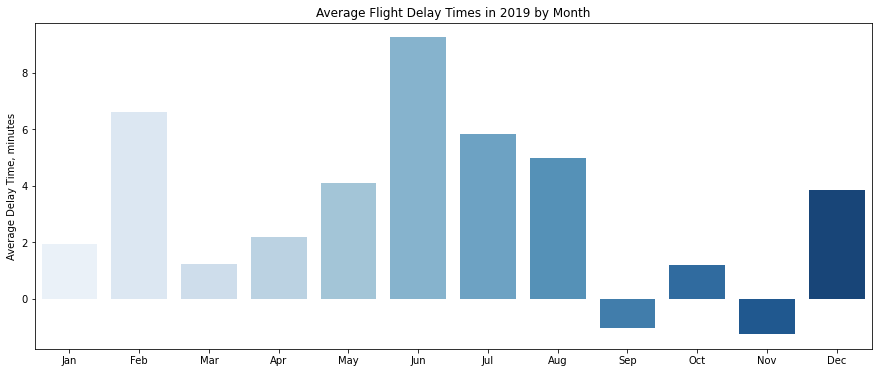

In [98]:
# Plot pie chart.
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = delay_means['arr_delay']

fig = plt.figure(figsize=(15,6))
sns_plot = sns.barplot(x=x, y=y, palette="Blues")
plt.title("Average Flight Delay Times in 2019 by Month")
plt.ylabel("Average Delay Time, minutes")
plt.show()

In [99]:
fig.savefig('Average Flight Delay Times')

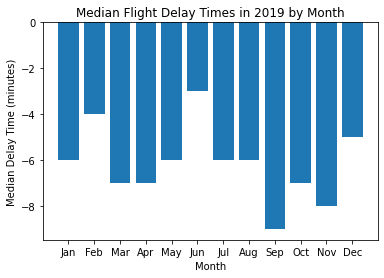

In [42]:
# Plot chart
data = delay_medians['arr_delay']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xlabel('Month')
plt.ylabel('Median Delay Time (minutes)')
plt.title('Median Flight Delay Times in 2019 by Month')
plt.bar(x=labels, height=data)
plt.show()

In [43]:
# Check flight counts by month from unfiltered dataset
flight_counts = df_flights_all_2019_months.groupby('fl_month')['fl_date'].count().reset_index()

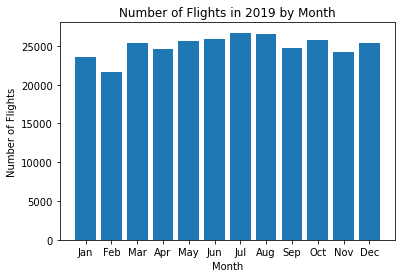

In [44]:
# Plot chart
data = flight_counts['fl_date']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Number of Flights in 2019 by Month')
plt.bar(x=labels, height=data)
plt.show()

**Explanation**

The delays seem higher in the February, June to August, and December. Possible reasons:

* Not all flights are fully booked with passengers. However, during these months, the number of passengers per flight could be higher (due to holidays and vacations).
* The proportion of non-business passengers flying during these months is probably higher than normal. Late-arriving aircraft could be more likely if the passengers feel less obligated to show up on time.
* Air traffic control issues due to slightly higher number of flights in summer and December.
* Possibly more extreme weather in these months (to be analyzed below).

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [45]:
import os
from IPython.display import JSON
import requests as re
import time

In [46]:
df_flights['state'] = df_flights['origin_city_name'].str[-2:]

In [47]:
# Find all unique cities on a given day for an API query.

#df_flights[df_flights['fl_date'] < '2019-01-01'].groupby(by=['fl_date','state'],axis=0).size()
#df_flights[(df_flights['fl_date'] >= '2019-01-01') & (df_flights['fl_date'] <= '2019-01-01')].groupby(by=['fl_date','origin_city_name'],axis=0).size()
df_flights[df_flights['fl_date'] == '2019-01-01'].groupby(by=['fl_date','origin_city_name'],axis=0).size()

fl_date     origin_city_name
2019-01-01  Aberdeen, SD         2
            Abilene, TX          5
            Aguadilla, PR        8
            Akron, OH           19
            Albany, GA           2
                                ..
            Wilmington, NC      19
            Worcester, MA        4
            Wrangell, AK         2
            Yakima, WA           4
            Yuma, AZ             3
Length: 343, dtype: int64

In [48]:
df_flights_20190101 = df_flights[df_flights['fl_date'] == '2019-01-01']
df_flights_20190101['origin_city_name'].unique().tolist();

In [49]:
# Set up API query function
api_key = os.environ["VisualCrossing_API_Code"]

def weather_query_oneday(flightsDF):
    '''
    Given a dataframe of flights info on a given day, return a list of weather conditions for each unique origin city.
    '''
    
    city_list = flightsDF['origin_city_name'].unique().tolist()
    city_list_cleaned = []
    
    # Replace forward slashes in city names
    for elem in city_list:
        if elem.find('/') == -1:
            city_list_cleaned.append(elem)
        else:
            city_list_cleaned.append(elem.replace('/','-'))
    
    date = flightsDF['fl_date'].iloc[0]
    
    weather_conditions_list = []
    weather_conditions_dict = {}

    for i in range(0,len(city_list_cleaned)):
        res = re.get(f'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{city_list_cleaned[i]}/{date}?unitGroup=us&key={api_key}&include=current')
        weather_conditions_list.append(res.json()['days'][0]['conditions'])
        weather_conditions_dict.update({city_list[i]:weather_conditions_list[i]})
    
    return weather_conditions_dict

KeyError: 'VisualCrossing_API_Code'

In [50]:
df_flights_20190101_weather = weather_query_oneday(df_flights_20190101)

NameError: name 'weather_query_oneday' is not defined

In [51]:
def weather_simplification_dict(weather_dict):
    '''
    Given a list of weather conditions in a dictionary with cities, simplify the types into Sunny, Cloudy, Rainy, or Snow.
    '''

    weather_simplified = weather_dict.copy()

    for key, value in weather_dict.items():
        
        if value.find('Snow') > -1:
            weather_simplified.update({key:'Snow'})
            
        elif value.find('Rain') > -1:
            weather_simplified.update({key:'Rainy'})
            
        elif (value.find('cloudy') > -1) or (value.find('Overcast') > -1):
            weather_simplified.update({key:'Cloudy'})
            
        else:
            weather_simplified.update({key:'Sunny'})
    
    return weather_simplified

In [52]:
df_flights_20190101_weather_simplified = weather_simplification_dict(df_flights_20190101_weather)
df_flights_20190101_weather_simplified;

NameError: name 'df_flights_20190101_weather' is not defined

In [53]:
# Apply weather results to dataframe
df_flights_20190101['origin_weather'] = df_flights_20190101.apply(lambda row: df_flights_20190101_weather_simplified[row['origin_city_name']], axis=1)

# Set arr_delay nulls to zero
df_flights_20190101['arr_delay'].fillna(value=0, inplace=True)

df_flights_20190101.groupby('origin_weather').size()

NameError: name 'df_flights_20190101_weather_simplified' is not defined

In [54]:
# Create lists of delays for statistical analysis

sunny_delays_20190101 = df_flights_20190101[df_flights_20190101['origin_weather'] == 'Sunny']['arr_delay'].tolist()
cloudy_delays_20190101 = df_flights_20190101[df_flights_20190101['origin_weather'] == 'Cloudy']['arr_delay'].tolist()
rainy_delays_20190101 = df_flights_20190101[df_flights_20190101['origin_weather'] == 'Rainy']['arr_delay'].tolist()
snow_delays_20190101 = df_flights_20190101[df_flights_20190101['origin_weather'] == 'Snow']['arr_delay'].tolist()

KeyError: 'origin_weather'

In [55]:
# Try combinations of weather delays to see if they come from the same distribution.

print('All:',stats.f_oneway(sunny_delays_20190101, cloudy_delays_20190101, rainy_delays_20190101, snow_delays_20190101))
print('Sunny/Cloudy:',stats.f_oneway(sunny_delays_20190101, cloudy_delays_20190101))
print('Sunny/Rainy:',stats.f_oneway(sunny_delays_20190101, rainy_delays_20190101))
print('Sunny/Snow:',stats.f_oneway(sunny_delays_20190101, snow_delays_20190101))
print('Cloudy/Rainy:',stats.f_oneway(cloudy_delays_20190101, rainy_delays_20190101))
print('Cloudy/Snow:',stats.f_oneway(cloudy_delays_20190101, snow_delays_20190101))
print('Snow/Rainy:',stats.f_oneway(snow_delays_20190101, rainy_delays_20190101))

NameError: name 'sunny_delays_20190101' is not defined

**Result:**

With an alpha (significance level) of 0.05, we can reject the null hypothesis for all weather combinations except for Sunny/Rainy. One point to keep in mind is that these results are an approximation; this weather only corresponds to one day due to API limitations.

In other words, no delays come from the same distribution except for the weather combination of Sunny/Rainy.

Still, according to online research, weather delays only account for approximately 5 to 7% of primary flight delay reasons. [(reference)](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations)

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [56]:
# Taxi time - defined as the time between an airplane leaving a gate and the wheels being off the ground.

df_flights['departure_hour'] = pd.cut(df_flights['dep_time'],bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2359])
df_flights['arrival_hour'] = pd.cut(df_flights['arr_time'],bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2359])
avg_taxi_out_times = df_flights.groupby('departure_hour').mean()['taxi_out'].tolist()
avg_taxi_in_times = df_flights.groupby('arrival_hour').mean()['taxi_out'].tolist()
flight_counts = df_flights.groupby('departure_hour').size().tolist()

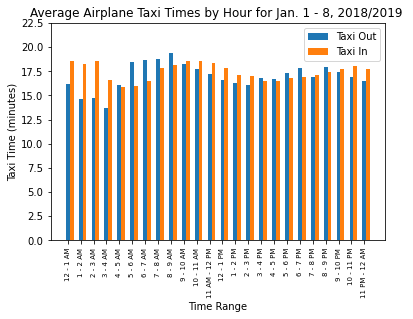

In [57]:
# Plot the taxi times in a multi-bar chart.

X = ['12 - 1 AM', '1 - 2 AM', '2 - 3 AM', '3 - 4 AM', '4 - 5 AM', '5 - 6 AM', '6 - 7 AM', '7 - 8 AM', '8 - 9 AM', '9 - 10 AM', '10 - 11 AM', '11 AM - 12 PM',
     '12 - 1 PM', '1 - 2 PM', '2 - 3 PM', '3 - 4 PM', '4 - 5 PM', '5 - 6 PM', '6 - 7 PM', '7 - 8 PM', '8 - 9 PM', '9 - 10 PM', '10 - 11 PM', '11 PM - 12 AM',]

X_axis = np.arange(len(X))

width=0.3

plt.bar(X_axis, avg_taxi_out_times, width=width, label = 'Taxi Out')
plt.bar(X_axis + width, avg_taxi_in_times, width=width, label = 'Taxi In')

plt.xticks(X_axis, X)
plt.tick_params(axis = 'x', which = 'major', labelsize = 7, labelrotation =90)
plt.xlabel("Time Range")
plt.ylabel("Taxi Time (minutes)")
plt.ylim(0, 22.5)
plt.title("Average Airplane Taxi Times by Hour for Jan. 1 - 8, 2018/2019 ")
plt.legend(loc='upper right')
plt.show()

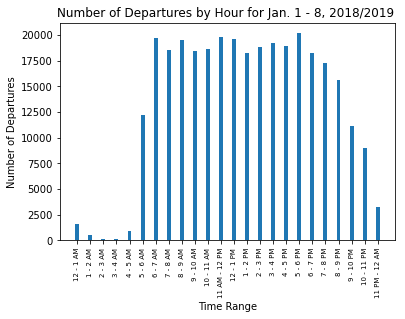

In [58]:
# Plot the taxi times in a multi-bar chart.

X = ['12 - 1 AM', '1 - 2 AM', '2 - 3 AM', '3 - 4 AM', '4 - 5 AM', '5 - 6 AM', '6 - 7 AM', '7 - 8 AM', '8 - 9 AM', '9 - 10 AM', '10 - 11 AM', '11 AM - 12 PM',
     '12 - 1 PM', '1 - 2 PM', '2 - 3 PM', '3 - 4 PM', '4 - 5 PM', '5 - 6 PM', '6 - 7 PM', '7 - 8 PM', '8 - 9 PM', '9 - 10 PM', '10 - 11 PM', '11 PM - 12 AM',]

X_axis = np.arange(len(X))

plt.bar(X_axis, flight_counts, width=0.3)

plt.xticks(X_axis, X)
plt.tick_params(axis = 'x', which = 'major', labelsize = 7, labelrotation =90)
plt.xlabel("Time Range")
plt.ylabel("Number of Departures")
plt.title("Number of Departures by Hour for Jan. 1 - 8, 2018/2019 ")
plt.show()

**Results**

Based on the graphs above, we can conclude the following about taxi times:

* The Taxi Out times noticeably faster than Taxi In times in the early hours of the morning (12 - 4 AM). The Taxi Out times are likely faster because there is less traffic at these hours. Taxi In times may be longer due to less personnel available to guide planes upon landing.
* The Taxi Out times noticeably longer than Taxi In times in the later in the morning (5 - 7 AM). The Taxi Out times are likely longer due to higher traffic from business flights.
* The rest of the taxi times are relatively comparable throughout the day. The highest difference occurs in the morning.

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [59]:
delay_df = df_flights.iloc[:,33:38].fillna(value=0)
delay_sums = delay_df.astype(bool).sum(axis=0)
delay_sums

carrier_delay          36607
weather_delay           4576
nas_delay              33154
security_delay           345
late_aircraft_delay    35354
dtype: int64

In [60]:
delay_percentages = []

for i in range(0,len(delay_sums)):
    if i == 3:
        # Add extra significant digits
        delay_percentages.append(round(delay_sums[i]/sum(delay_sums)*100,2))
    else:
        delay_percentages.append(round(delay_sums[i]/sum(delay_sums)*100,))

delay_percentages

[33, 4, 30, 0.31, 32]

In [61]:
print(f'Percentage of delays created by late aircraft: {round(delay_sums[4]/sum(delay_sums)*100,)}%')

Percentage of delays created by late aircraft: 32%


In [62]:
# Extra statistics

print(f'Percentage of delays created by air carrier: {delay_percentages[0]}%')
print(f'Percentage of delays created by weather: {delay_percentages[1]}%')
print(f'Percentage of delays created by national aviation system: {delay_percentages[2]}%')
print(f'Percentage of delays created by security: {delay_percentages[3]}%')

Percentage of delays created by air carrier: 33%
Percentage of delays created by weather: 4%
Percentage of delays created by national aviation system: 30%
Percentage of delays created by security: 0.31%


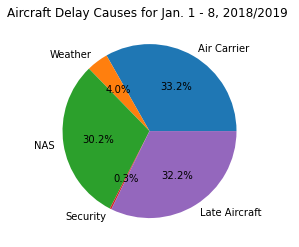

In [66]:
# Plot pie chart.

X = ['Air Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']

width=0.3

plt.pie(x=delay_percentages, labels=X, autopct='%.1f%%')

plt.title("Aircraft Delay Causes for Jan. 1 - 8, 2018/2019 ")
plt.show()

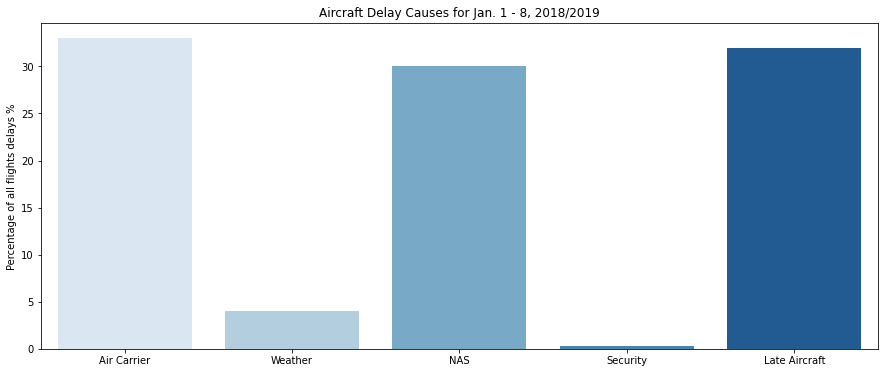

In [94]:
# Plot pie chart.
x = ['Air Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
y = delay_percentages

fig = plt.figure(figsize=(15,6))
sns_plot = sns.barplot(x=x, y=y, palette="Blues")
plt.title("Aircraft Delay Causes for Jan. 1 - 8, 2018/2019")
plt.ylabel("Percentage of all flights delays %")
plt.show()

In [96]:
fig.savefig('Aircraft Delay Causes')

**Result**

About one third of all flights are delayed by late aircraft. According to some reading, pilots actually can choose to fly faster to lower the delay during the flight, but at the cost of higher fuel consumption. [(reference)](https://fivethirtyeight.com/features/flight-delayed-your-pilot-really-can-make-up-the-time-in-the-air/)

## Other Exploratory Analysis

In [ ]:
# Look through flight data from January 2020
df_flights_test = pd.read_csv('flights_test.csv')

# Move column names to first row of data
df_flights_test = (df_flights_test.T.reset_index().T.reset_index(drop=True))

# Define new column names
df_flights_test.columns = ['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance']

# Clean up fl_date
df_flights_test['fl_date'] = df_flights_test['fl_date'].str[0:10]

In [ ]:
df_flights_test.head(1)

In [ ]:
df_flights_test.isna().sum()

In [ ]:
df_flights_test['fl_date'].value_counts()

In [ ]:
# Check for a relationship between tail number and delay time

tail_num_delay_mean = df_flights.groupby('tail_num').mean()['arr_delay'].reset_index()
tail_num_count = df_flights.groupby('tail_num').count()['arr_delay']
tail_num_delay_mean['count'] = tail_num_count.values
tail_num_delay_mean.sort_values(by='arr_delay', ascending=False)

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?